<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 159.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 177.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 134.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 117.6 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [11]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [12]:
## Write your code here
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
# 2. Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]
print("First 5 duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows: 20
First 5 duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-s

### Task 2: Analysis of Duplicate Response Patterns
1. Identify duplicate response patterns based on selected columns such as MainBranch, Employment, and RemoteWork.
2. Clarify that these represent multiple respondents with identical answers rather than duplicate records. Analyse which other columns frequently share identical values within these response-pattern groups.
   


In [13]:
# Select columns used to define response patterns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']

# Identify rows that share identical values in these columns
shared_patterns = df[df.duplicated(subset=subset_cols, keep=False)]

print(f"Number of responses sharing identical patterns: {len(shared_patterns)}")

# Count how many respondents fall into each response pattern
pattern_counts = (
    df.groupby(subset_cols)
      .size()
      .reset_index(name='Count')
      .sort_values('Count', ascending=False)
)

print("Top 5 most common response patterns:")
print(pattern_counts.head())

print("\n--- CLARIFICATION ---")
print(f"Since Each shared pattern among the top five most common response patterns has a record count that is significantly higher than the {len(duplicate_rows)} actual duplicates identified in Task 1.")
print("=> The VAST MAJORITY of these rows are distinct respondents giving identical answers.")

Number of responses sharing identical patterns: 65290
Top 5 most common response patterns:
                        MainBranch  \
0   I am a developer by profession   
2   I am a developer by profession   
1   I am a developer by profession   
78  I am a developer by profession   
8   I am a developer by profession   

                                           Employment  \
0                                 Employed, full-time   
2                                 Employed, full-time   
1                                 Employed, full-time   
78  Independent contractor, freelancer, or self-em...   
8   Employed, full-time;Independent contractor, fr...   

                              RemoteWork  Count  
0   Hybrid (some remote, some in-person)  15288  
2                                 Remote  12196  
1                              In-person   7118  
78                                Remote   2815  
8                                 Remote   1754  

--- CLARIFICATION ---
Since Each sha

In [14]:
# Exclude pattern-defining columns
other_cols = [col for col in df.columns if col not in subset_cols]

# Compute number of unique values per column within each pattern
pattern_variability = (
    df.groupby(subset_cols)[other_cols]
      .nunique()
      .reset_index()
)

# Count how frequently each column remains identical across patterns
frequent_shared_columns = (
    (pattern_variability[other_cols] == 1)
    .sum()
    .sort_values(ascending=False)
)

print("\nColumns that most frequently share identical values within these response patterns:")
print(frequent_shared_columns.head(10))


Columns that most frequently share identical values within these response patterns:
Check           449
SOAccount       193
AISelect        191
AIThreat        179
SurveyLength    176
Age             160
SurveyEase      160
AISent          151
NEWSOSites      150
SOVisitFreq     142
dtype: int64


/tmp/ipykernel_298/2799024215.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index()


### Task 3: Visualize Shared Response Patterns
1. Create visualizations to show the distribution of shared response patterns across different categories.
2. Use bar charts or pie charts to represent the distribution of respondents who share identical values for MainBranch, Employment, and RemoteWork, grouped by Country and Employment.


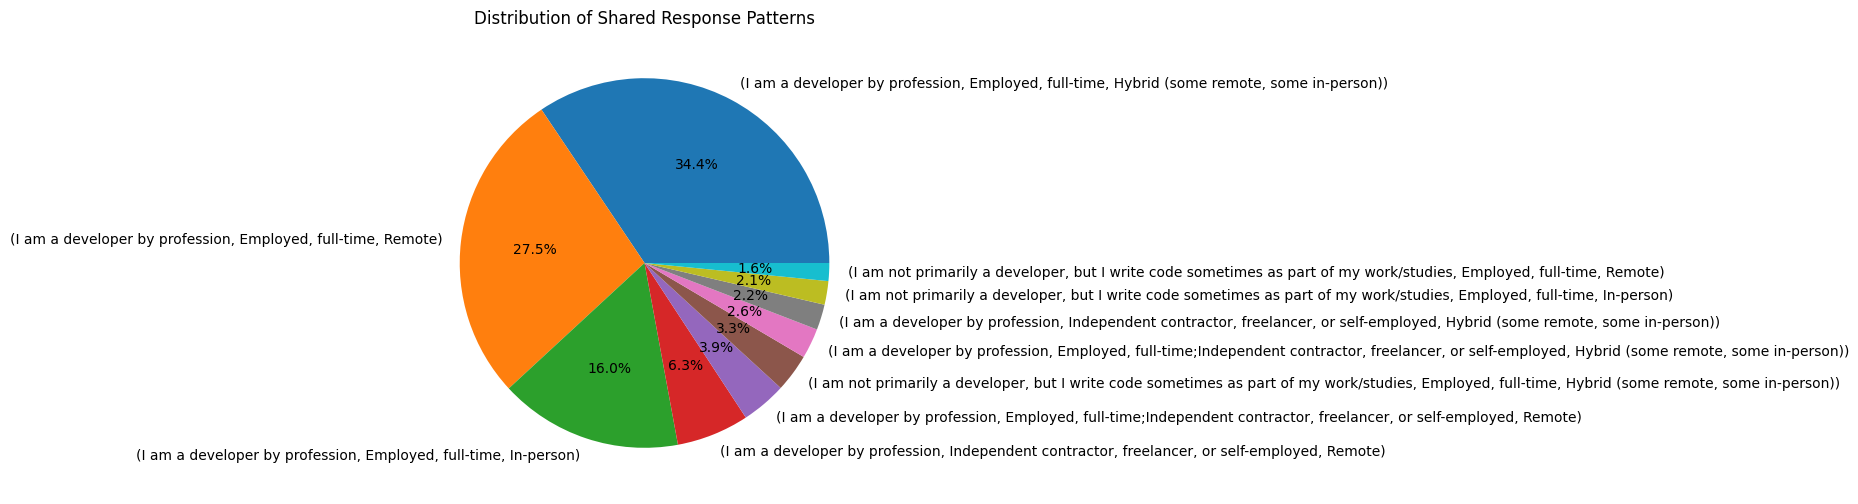

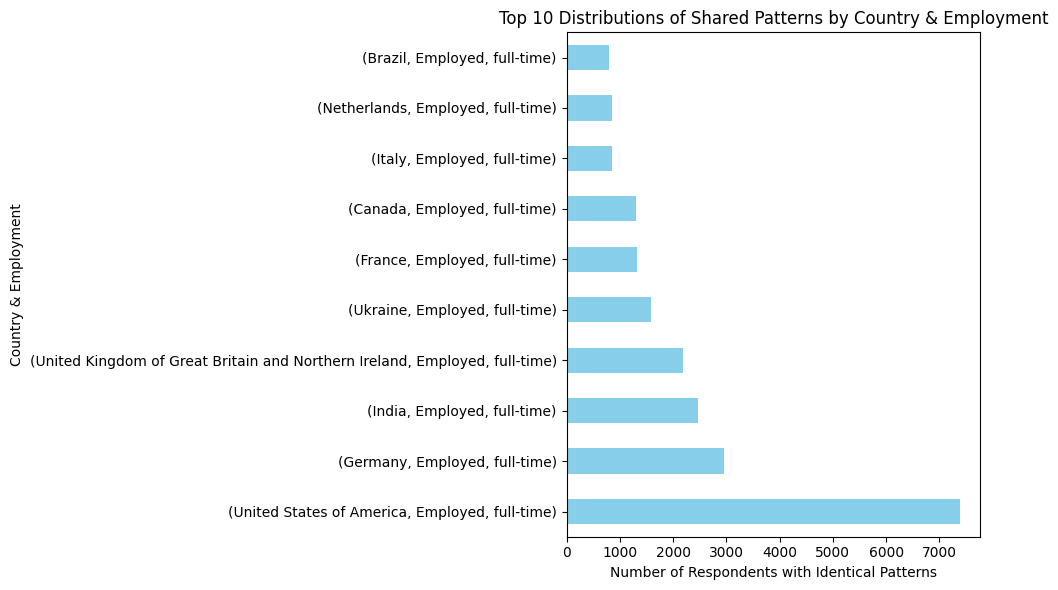

In [16]:
## Write your code here
# Requirement 1:
# Distribution of shared response patterns
pattern_distribution = shared_patterns[
    ['MainBranch', 'Employment', 'RemoteWork']
].value_counts()

plt.figure(figsize=(6, 6))
pattern_distribution.head(10).plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title('Distribution of Shared Response Patterns')
plt.ylabel('')
plt.show()

# Requirement 2:
# Distribution grouped by Country & Employment
# Group by Country and Employment and count occurrences
grouped_counts = (shared_patterns.groupby(['Country', 'Employment']).size().sort_values(ascending=False))

plt.figure(figsize=(10, 6))

grouped_counts.head(10).plot(kind='barh', color='skyblue')

plt.title('Top 10 Distributions of Shared Patterns by Country & Employment')
plt.xlabel('Number of Respondents with Identical Patterns')
plt.ylabel('Country & Employment')
plt.tight_layout()
plt.show()

### Task 4: Evaluate Duplicate Handling Strategy
1. Analyse the dataset to determine which column(s) define record uniqueness.
2. Assess whether removing rows based on a subset of columns (rather than complete row duplication) is appropriate.
Justify your decision with reference to the structure and purpose of the dataset.


In [17]:
## Write your code here
# 1. Check if ResponseId is unique
is_id_unique = df['ResponseId'].is_unique
print(f"Is ResponseId unique for every row? {is_id_unique}")
# 2. Check for duplicates in ResponseId specifically
id_duplicates = df.duplicated(subset=['ResponseId']).sum()
print(f"Number of duplicate ResponseIds: {id_duplicates}")
# Strategy Decision:
if not is_id_unique:
    print("Action: Remove rows with duplicate ResponseId as they represent data errors.")
    # Remove duplicates based on ResponseId, keeping the first occurrence
    df_cleaned = df.drop_duplicates(subset=['ResponseId'], keep='first')
    print(f"Rows after removing duplicates: {len(df_cleaned)}")
else:
    print("Action: No duplicate IDs found. Only remove exact row duplicates.")
    df_cleaned = df.drop_duplicates()

Is ResponseId unique for every row? False
Number of duplicate ResponseIds: 20
Action: Remove rows with duplicate ResponseId as they represent data errors.
Rows after removing duplicates: 65437


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
